### Plasma two-fluid equations

As a next step we investigate the two-fluid equations (also known as two-fluid Euler-Poisson system)
 \begin{align}
     \frac{\partial }{\partial t} n_e&= - \frac{\partial}{\partial x} (u_en_e )  + S_{n} \\
     \frac{\partial }{\partial t} n_i&= - \frac{\partial}{\partial x} (u_in_i )  + S_{n} \\   
    \frac{\partial }{\partial t} n_eu_e&= - \frac{\partial}{\partial x} n_eu_e^2 - \frac{\tau_e}{\mu_e}\frac{\partial}{\partial x} n_e - \frac{1}{\mu_e} n_e\frac{\partial}{\partial x} \phi - \frac{\eta}{\mu_e} n_i (n_i u_i - n_e u_e) + \nu_{u,e}\frac{\partial^2}{\partial x^2} u_e\\
     \frac{\partial }{\partial t} n_iu_i&= - \frac{\partial}{\partial x} n_iu_i^2 - \frac{\tau_i}{\mu_i}\frac{\partial}{\partial x} n_i - \frac{1}{\mu_i}n_i\frac{\partial}{\partial x} \phi - \frac{\eta}{\mu_i} n_i (n_i u_i - n_e u_e) + \nu_{u,i}\frac{\partial^2}{\partial x^2} u_i
 \end{align}
 which is closed by the one-dimensional Poisson equation
 \begin{align}
 -\frac{\partial^2}{\partial x^2} \phi = \frac{n_i - n_e}{\epsilon_D}
 \end{align}
 
 where we have Gyro-Bohm normalization and $\mu_e = -m_e/m_i$, $\mu_i = 1$, $\tau_e = -1$ and $\tau_i = T_i / T_e$. Further, 
 we have $\eta = 0.51 \nu_{ei,0}/ \Omega_{ce}$ and $\nu_{u,e} = 0.73
 \Omega_{ce} / \nu_{ei,0}$ and $\nu_{u,i} = 0.96 \Omega_{ci} / \nu_{ii,0}$. Last, we have the Debye parameter $\epsilon_D = \lambda_D^2 / \rho_s^2$ with the Debye length $\lambda_D$ and the
 ion gyro-radius at electron temperature $\rho_s$. Note that we choose the peculiar signs in $\mu_e$ and $\tau_e$ such that the electron and ion momentum equations have exactly the same form, which makes it easy to implement.
 
 Also note that we choose Bohm normalization based on gyro-radius $\rho_s$ and gyro-frequency $\Omega_{ci}$  because this is how we normalize the three-dimensional model. However, there is no magnetic field in the model and so the gyration does not appear. The more natural normalisation uses plasma frequency and Debye length, which makes the $\epsilon_D$ parameter disappear {cite}`Sack1987`. 
 
 The spatial domain is given by
$[-L_\parallel /2 ; L_\parallel/2]$, where $L_\parallel = 2\pi q R_0$ with $q=3$ and $R_0=0.545$m approximating the length of a fieldline from divertor to divertor in the Compass SOL. We use $N_x$ points.
 
 #### Neutral fluid limit
 We reach the limit of Navier Stokes fluid equations by first setting
 $\mu_e = 0$. Then we find from the electron momentum equation $-\tau_e \partial_x n_e - n_e\partial_x \phi - \eta n_e j = 0$, which
yields the force term $-\tau_i \partial_x n_i + \tau_e \partial_x n_i + \tau_e \epsilon_D \partial_x^3 \phi + \epsilon_D \partial_x (\partial_x \phi)^2 / 2 $ in the ion momentum equation. In the limit $\epsilon_D=0$ the
ion continuity and ion momentum equations thus decouple from the system and yield the Navier Stokes equations.

#### Adiabatic electrons
In the limit of $\mu_e=0$ and vanishing resistivity $\eta =0$
the electron force balance reduces to $\partial_x n_e = n_e \partial_x\phi$ which is solved by $n_e = n_{e,0}\exp(\phi)$. 
 \begin{align}
     \frac{\partial }{\partial t} n_i&= - \frac{\partial}{\partial x} (u_in_i ) + S_{n} \\   
     \frac{\partial }{\partial t} n_iu_i&= - \frac{\partial}{\partial x} n_iu_i^2 - \tau_i\frac{\partial}{\partial x} n_i - n_i\frac{\partial}{\partial x} \phi + \nu_{u,i}\frac{\partial^2}{\partial x^2} u_i
 \end{align}
 which is closed by the one-dimensional non-linear Poisson   equation (choosing $n_{e,0}=1$)
 \begin{align}
 -\frac{\partial^2}{\partial x^2} \phi = \frac{n_i - \exp(\phi)}{\epsilon_D}
 \end{align}

In [9]:
import sys
sys.path.append( '/home/codebind/Dokumenter/GitHub/simplesimdb/' )
# sys.path.append( '/home/codebind/Dokumenter/GitHub/feltorutilities/')
# for p in sys.path:
    # print( p )
import numpy as np
import simplesimdb as simplesim
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from importlib import reload  
import feltorutilities as fp
fp = reload(fp)

# beder brugeren om et filnavn: 
fileName = input("Enter file name:")
print(fileName)

Enter file name:PF x10 for stor
PF x10 for stor


In [10]:
# Sætter nogle fysiske parametre  

# These parameters are for a Tokamak
    # liste med værdinavne og bibliotek (Physical) med værdier
#show = ["name", "mu", "R_0", "resistivity", "tau", 
#       "epsilon_D", "viscosity_e", "viscosity_i"]
show = ["name", "mu", "m_i", "R_0", "a_0", "beta", "resistivity", "tau",
        "T_e", "n_0", "B_0", "epsilon_D",
        "omega_0_inv", "viscosity_e", "viscosity_i"]
physical={"name" : "Compass", 
    "beta"   : 1e-4, "resistivity": 1e-4, #change both to change n_0
    "tau"    : 1,                # Relativ temp forskel (Ti/Te)
    "m_i"    : fp.deuteron_mass, # Ionmasse
    "R_0"    : 545,              # Machine radius relativ til Larmor radius (rhos_s)
    "R"      : 0.545,            # Machine radius
    "a"      : 0.175,            #
    "q"      : 2,                #
    "scaleR" : 1.45,             #  
    "Nz"     : 32}               # Gridstørrelse
# Udregner mu, T_e, T_i,n_0, B_0, og epsilon_D ud fra de indtastede værdier i "physical" og tilføjer til "physical"
fp.numerical2physical( physical, physical)

# Laver bibliotek med show-værdierne ud fra værdierne i "physical"
table = dict()
for s in show :
    table[s] = fp.parameters2quantity( physical, s)  

# Indsætter lx-værdien ud fra R0 værdien i table samt de resterende indsatte værdier fra physical
table["lx"] = 2*np.pi*table["R_0"]*3 # længden af x-aksen
table["m_e"] = -table["mu"]*table["m_i"]
table["R"] = physical["R"]
table["a"] = physical["a"]
table["q"] = physical["q"]
table["scaleR"] = physical["scaleR"]
table["Nz"] = physical["Nz"]

# Printer table
for s in [*show, "lx"]:
    print( s, "\t\t", table[s])
print( table["viscosity_i"]/ (2*np.pi*3*table["R_0"])**2  )


# ----- Bestemmer skaleringskonstanter -----
# Henter relevante konstanter
B_0 = table["B_0"]
m_i = table["m_i"]
m_e = table["m_e"]
T_e = table["T_e"]
R   = table["R"]

# Regner skaleringskonstanter 
rho_s = fp.rho_s( B_0, m_i, T_e)      # Rumskalering  (Larmorradius)
omega_0_inv = fp.omega_0_inv(B_0,m_i) # Tidsskalering (Larmorfrekvens)
c_s = fp.c_s(m_i,T_e)                 # Hastighedsskalering (Ionlydhastighed)
Phi_0 = fp.Phi_0(T_e)                 # Potentialeskalering
Psip_0 = fp.Psip_0(B_0,m_i,T_e, R)    # Magnetisk flux skalering

# Densiteten, n, er skaleret med 1e19, så denne værdi skal ganges på, for at på fysisk n 

# Indskriver det i en ordbog: 
scaleConstants={
    "rho_s" : rho_s,
    "omega_0_inv" : omega_0_inv,
    "c_s" : c_s,
    "Phi_0" : Phi_0,
    "Psip_0" : Psip_0
}


Invert for given R
name 		 Compass
mu 		 -0.027244371074816382
m_i 		 3.3435837724e-27
R_0 		 545
a_0 		 17.499999999718177
beta 		 0.0001
resistivity 		 0.0001
tau 		 1
T_e 		 2.4590151164156397
n_0 		 0.010365292380932428
B_0 		 0.022653301582300542
epsilon_D 		 1.3110461442088287e-05
omega_0_inv 		 9.212347427961541e-07
viscosity_e 		 3699.9999999584807
viscosity_i 		 1138.9049595303804
lx 		 10273.007977238623
1.0791758882599385e-05


In [11]:
# Danner de parametre der er vores plasma input

# The code plasma.cpp discretizes the above equations
    # in space and time with various schemes.
# In the following we document the possible input parameters:
# PARAM: physical: dict with entries: "lx", "mu", "epsilon_D",
    # "viscosity_e", "viscosity_i", "resistivity", "tau"
def make_plasma_input(physical) :
    # Returnerer flere biblioteker af værdier
    return {
    "grid" : 
    {
        # number of grid points
        "Nx" : 100, # (Original=32)
        # definerer x-aksen
        "x" : [-table["lx"]/2, table["lx"]/2],
    },
        # ----- Forskellige startbetingelser -----
#     "init":
#     {
#         # A sine wave in density with 0 velocity
#         "type" : "wave",
#         "amp" : 0.5,
#         "n_0" : 1,
#         "k" : 4*np.pi,
#         "x_0" : 0
#     },
#     "init":
#     {
#         "type" : "step", # a step in density, 0 velocity
#         "x_a" : 0.5, # location of jump
#         "n_l" : 1,   # density left of jump
#         "n_r" : 0.2, # density right of jump
#     },
    "init":
    {
        "type" : "soft-step",
        "x_a" : 0., # location of jump (in units of lx)
        "alpha" : 0.1, # transition width (in units of lx) (=0.001 for hard step function) (=0.1 blød stepfunktion)
        # [x_a - alpha/2, x_a+alpha/2]
        "n_l" : 1,   # density left of jump
        "n_r" : 0.01, # density right of jump (Original: 0.2)
    },
#     "init":
#     {
#          # Manufactured solution without shock
#         "type" : "mms",
#         "n_0" : 1,
#         "u_0" : 0.5,
#         "A" : 0.2,
#         "B" : 0.1,
#         "k" : 4*np.pi,
#         "v" : 1
#     },
    "advection" : 
    {
        "type" : "staggered", 
        # centered
        # staggered (allows variant)
        "variant" : "original"
        # original (The original scheme, 1st order)
        # explicit (Take force terms explicitly)
        # slope-limiter (Use 2nd order flux)
        # slope-limiter-explicit (Use 2nd order flux
        #     and force terms explicit)
    },
    "timestepper":
    {
        # The Additive Runge Kutta (ARK) method is a semi-implicit
        # embedded Runge Kutta scheme that works for all (explicit
        # and implicit) advection schemes above
        "type" : "ARK",
        "tableau" : "ARK-4-2-3",
        "rtol" : 1e-6, # relative tolerance (Original 1e-6) (Mindsker fluktueringer - Hold lav)
        "atol" : 1e-7  # absolute tolerance (Original 1e-7)
        # The Embedded Runge Kutta (ERK) only works 
        # for explicit schemes
        # "type" : "ERK", 
        # "tableau" : "Bogacki-Shampine-4-2-3"
    },
    "physical":
    {
        "type" : "original", # plasma two-fluid equations
#         "type" : "adiabatic", # adiabatic electrons 
        # n_e and u_e are 0 in output file
        "nu_u" : [table["viscosity_e"], table["viscosity_i"]],
        # viscosity for [electrons, ions]
        "nu_n" : [0.0, 0.0], 
        # diffusivity for [electron, ions]
        # (can be used to stabilize)
        "resistivity" : table["resistivity"],
        # plasma resistivity eta
        "mu" : table["mu"],
        # negative electron to ion mass ratio
        "tau" : table["tau"],
        # ion to electron temperature ratio
        "epsilon_D" : table["epsilon_D"]
    },
    "constants":
    {
        "epsilon_0" :  8.8542e-12 # [F/m]
    },
    "bc" : # Randbetingelser
    {
         # one of PER, NEU, DIR, DIR_NEU, NEU_DIR
        "density": "NEU",
        "velocity" : "NEU",
        "potential" : "DIR_NEU"
    },
    "poisson":
    {
#         "type" : "anderson", # most general non-linear solver
        "type" : "gmres",
#         "type" : "cg", # if it works it is the fastest method
#         "type" :"bicgstab",
#         # parameters for iterative solvers
        "max_inner" : 30, # 30 is a good number
        "max_outer" : 3, # 3-10
        "l_input" : 3, # 2-4 is a good number
        "mMax" : 10, # 3 - 10 is a good number
        "damping" : 1e-2, # 0.1 to 1e-3 is a good start
        
        "eps" : 1e-12, # accuracy          
    },
    "output":
    {
        # The simulation will run from t = 0 to t = t_end
        "tend" : 1, # end time (kort=0.001)
        # Choose a number of (equidistant in time) outputs
        # in output file (excluding first)
        "maxout" : 100
    }
    }

In [12]:
# Deler make_plasma_input op i ikke-adiabatisk og adiabatiske værdier: 

# ----- Ikke-adiabatiske værdier ----- 
params1 = make_plasma_input(table)

#params1["init"]["alpha"] = 0.4
#params1["init"]["n_r"] = 0.01
#params1["grid"]["Nx"]= 100
#params1["timestepper"]["type"] = "ARK"
#params1["timestepper"]["tableau"]  = "ARK-4-2-3"
#params1["timestepper"]["rtol"] = 1e-5
#params1["poisson"]["eps"]= 1e-12
params1["poisson"]["type"] = "bicgstab"
#params1["poisson"]["damping"] = 1e-1

#params1["physical"]["mu"] = -1
#params1["physical"]["nu_u"] = [0.,0.]
params1["physical"]["tau"] = 0.
params1["physical"]["type"] = "original"
#params1["physical"]["resistivity"] = 0.0

params1["advection"] = {"type" : "staggered"}
#params1["output"]["tend"] = 1 #1e-4 to 1e-2
params1["output"]["maxout"] = 100


# ----- Adiabatiske værdier ----- 
params2 = make_plasma_input(table)

#params2["init"]["alpha"] = 0.001
#params2["init"]["n_r"] = 0.2
#params2["grid"]["Nx"]= 400
#params2["timestepper"]["type"] = "ARK"
#params2["timestepper"]["tableau"]  = "ARK-4-2-3"
#params2["timestepper"]["rtol"] = 1e-5
#params2["poisson"]["eps"]= 1e-12
params2["poisson"]["type"] = "anderson"
#params2["poisson"]["damping"] = 1e-1

#params2["physical"]["nu_u"] = [0.,0.]
#params2["physical"]["mu"] = -1
params2["physical"]["tau"] =1.
params2["physical"]["type"] = "adiabatic"
#params2["physical"]["resistivity"] = 0.0

params2["advection"] = {"type" : "staggered"}
params2["output"]["tend"] =1e2 #1e-4 to 1e-2
params2["output"]["maxout"] = 100


# Gemmer alle inputdataen i datafilen: 

String1 = ""
for i in table:
    String1 = String1 + str(i) + "\t\t= " + str(table[i]) + "\n"

String2 = ""
for i in scaleConstants:
    String2 = String2 + str(i) + "\t\t= " + str(scaleConstants[i]) + "\n"

String12 = " ----- Table Values ----- \n \n" + String1 + "\n \n ----- Scale constants ----- \n \n" + String2 + "\n\n"

String3 = ""
for i in params1:
    String3 = String3 + str(i) + "\t\t= " + str(params1[i]) + "\n"

String4 = ""
for i in params2:
    String4 = String4 + str(i) + "\t\t= " + str(params2[i]) + "\n"

String34 = " ----- Plasma input for non-adiabatic simulation ----- \n \n" + String3 + "\n \n ----- Plasma input for adiabatic simulation ----- \n \n" + String4
String = String12 + String34


my_file = open("/media/sf_Linux_VM_shared_folder/Simuleringsdata/Simulation_Data("+fileName+").txt","w+")
my_file.write(String)
my_file.close()


In [13]:
# Vi arbejder her i simplesimdb.py 

# Definerer executable (plasma), inputfil (temp.json)  og outputfil (temp.nc) 
    # (Ændrer temp.nc ud fra inputværdierne ovenover)
rep = simplesim.Repeater("./plasma","temp.json", "temp.nc")
rep.clean()  # Fjerner gammel input- og outputfil 
inputfile = make_plasma_input(table)    # Redefinerer inputfilen ud fra "table"

# Genererer inputfil (temp.json) og kører plasma-simuleringen og gemmer resultaterne som en .nc-fil (temp-nc)
rep.run( inputfile, error="display", stdout="ignore")
ncin = Dataset( "temp.nc", 'r', format="NETCDF4") # Åbner temp.nc-filen, så Python kan læse den. 
var = ncin.variables  # Gemmer dataen fra temp.nc i variablen, "var"

# Printer de fysiske parametre som simuleringen kom frem til:
print( "FILE CONTENTS")
for v in ncin.variables:
    if v == "time" : 
        print(f"{v} {ncin.variables[v].shape}")
    else : 
        print( f"{v} {ncin.variables[v].shape}",
            f"\t{ ncin.variables[v].long_name}")

ncin.close()

FILE CONTENTS
time (101,)
x (100,) 	x-coordinate in Computational coordinate system
failed (101,) 	Accumulated Number of failed steps
duration (101,) 	Computation time for the latest output
nsteps (101,) 	Accumulated Number of calls to the timestepper (including failed steps)
electrons (101, 100) 	Numerical electron density
ions (101, 100) 	Numerical electron density
ue (101, 100) 	Numerical electron velocity
ui (101, 100) 	Numerical ion velocity
potential (101, 100) 	potential
electrons_ana (101, 100) 	Analytical solution to the electron density
ions_ana (101, 100) 	Analytical solution to the ion density
ue_ana (101, 100) 	Analytical solution to the electron velocity
ui_ana (101, 100) 	Analytical solution to the ion velocity
potential_ana (101, 100) 	Analytical solution to the potential


In [14]:
# Again, we define a plotting routine that loops over
# parameters sets, runs simulations and plots the results
def plot_plasma( p_list):
    
    plt.rcParams.update({'font.size': 20})
    frows = 3
    fcols = 2

    fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')
    #https://matplotlib.org/stable/tutorials/colors/colormaps.html

    plotted = False
    for p in p_list :
        rep.clean()
        rep.run( p, error="display", stdout="ignore")
        ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
        var = ncin.variables
        
        time = var["time"][:] * omega_0_inv # Skalerer tiden
        x = var["x"][:] * rho_s # Skalerer x
        last_idx  = time.shape[0]-1
        nsteps = var["nsteps"][last_idx]
        failed = var["failed"][last_idx]
        error = (var["electrons"][:,:] - var["electrons_ana"][:,:]) * 1e19 # Skalerer fejlen for n_e
        norm_ana = np.linalg.norm( var["electrons_ana"][last_idx,:] * 1e19, ord=1) # Skalerer normet af n_e
        #norm_ana = np.size( error[last_idx,:])

        if not plotted and not norm_ana == 0:
            im = ax[0][0].plot(x, var["electrons_ana"][last_idx,:] * 1e19,   # Skalerer n_e
                            color='k', label="analytical", lw=4) 
            im = ax[0][1].plot(x, var["ions_ana"][last_idx,:] * 1e19,        # Skalerer n_i
                            color='k', label="analytical", lw=4)
            plotted = True
        l = f"{p['advection']['type']}"
        if( "variant" in p["advection"].keys() ):
            l = l + f" {p['advection']['variant']}"
        
        print(l)
        if not norm_ana == 0:
            print( f"L2 Error norm is {np.linalg.norm(error[last_idx,:], ord=1)/norm_ana:.2e}",end=" ")
        print( f"Function Calls is {nsteps} Failed {failed}")
        electrons = var["electrons"][last_idx,:] * 1e19    # Skalerer n_e
        if p["physical"]["type"] == "adiabatic" :
            electrons = np.exp( var["potential"][last_idx ,:] * 1e19)   # Skalerer n_e for adiabatisk e
        im = ax[0][0].plot(x,electrons, label=l, lw=4)
        im = ax[0][1].plot(x,var["ions"][last_idx,:]*1e19 -electrons, label=l, lw=4)
        im = ax[1][0].plot( x, var["ue"][last_idx,:] * c_s, lw=4)   # Skalerer elektronhastigheden
        im = ax[1][1].plot( x, var["ui"][last_idx,:] * c_s, lw=4)   # Skalerer ionhastigheden
        potential = var["potential"][last_idx,:] * Phi_0            # Skalerer potentialet
        im = ax[2][0].plot( x, potential, lw=4)
        electric = -np.gradient( potential, x)
        im = ax[2][1].plot( x, electric, lw=4)
        ncin.close()
    
    ax[0][0].set_title( f"electron density \n Nx = {p['grid']['Nx']} t = {time[last_idx]:8.4f}")
    ax[0][0].set_xlabel( r"$x$ [m]")
    ax[0][0].set_ylabel("$n$ [1/m³]")
    ax[0][0].legend()
    ax[0][0].grid()
    
    ax[0][1].set_title( f"charge density")
    ax[0][1].set_xlabel( r"$x$ [m]")
    ax[0][1].set_ylabel("$u$ [1/m³]")
    ax[0][1].grid()

    ax[1][0].set_title( f"electron velocity")
    ax[1][0].set_xlabel( r"$x$ [m]")
    ax[1][0].set_ylabel( r"$u_e$ [m/s]")
    ax[1][0].grid()

    ax[1][1].set_title( f"ion velocity")
    ax[1][1].set_xlabel( r"$x$ [m]")
    ax[1][1].set_ylabel( r"$u_i$ [m/s]")   
    ax[1][1].grid()

    ax[2][0].set_title( f"potential")
    ax[2][0].set_xlabel( r"$x$ [m]")
    ax[2][0].set_ylabel( r"$\phi$ [eV]")
    ax[2][0].grid()

    ax[2][1].set_title( f"electric field")
    ax[2][1].set_xlabel( r"$x$ [m]")
    ax[2][1].set_ylabel( r"$E$")   
    ax[2][1].grid()


First, we simulate the full plasma two-fluid system.

staggered slope-limiter-explicit
Function Calls is 3722.0 Failed 76.0
staggered slope-limiter-explicit
Function Calls is 3722.0 Failed 76.0
staggered slope-limiter-explicit
Function Calls is 3722.0 Failed 76.0
staggered slope-limiter-explicit
Function Calls is 3722.0 Failed 76.0


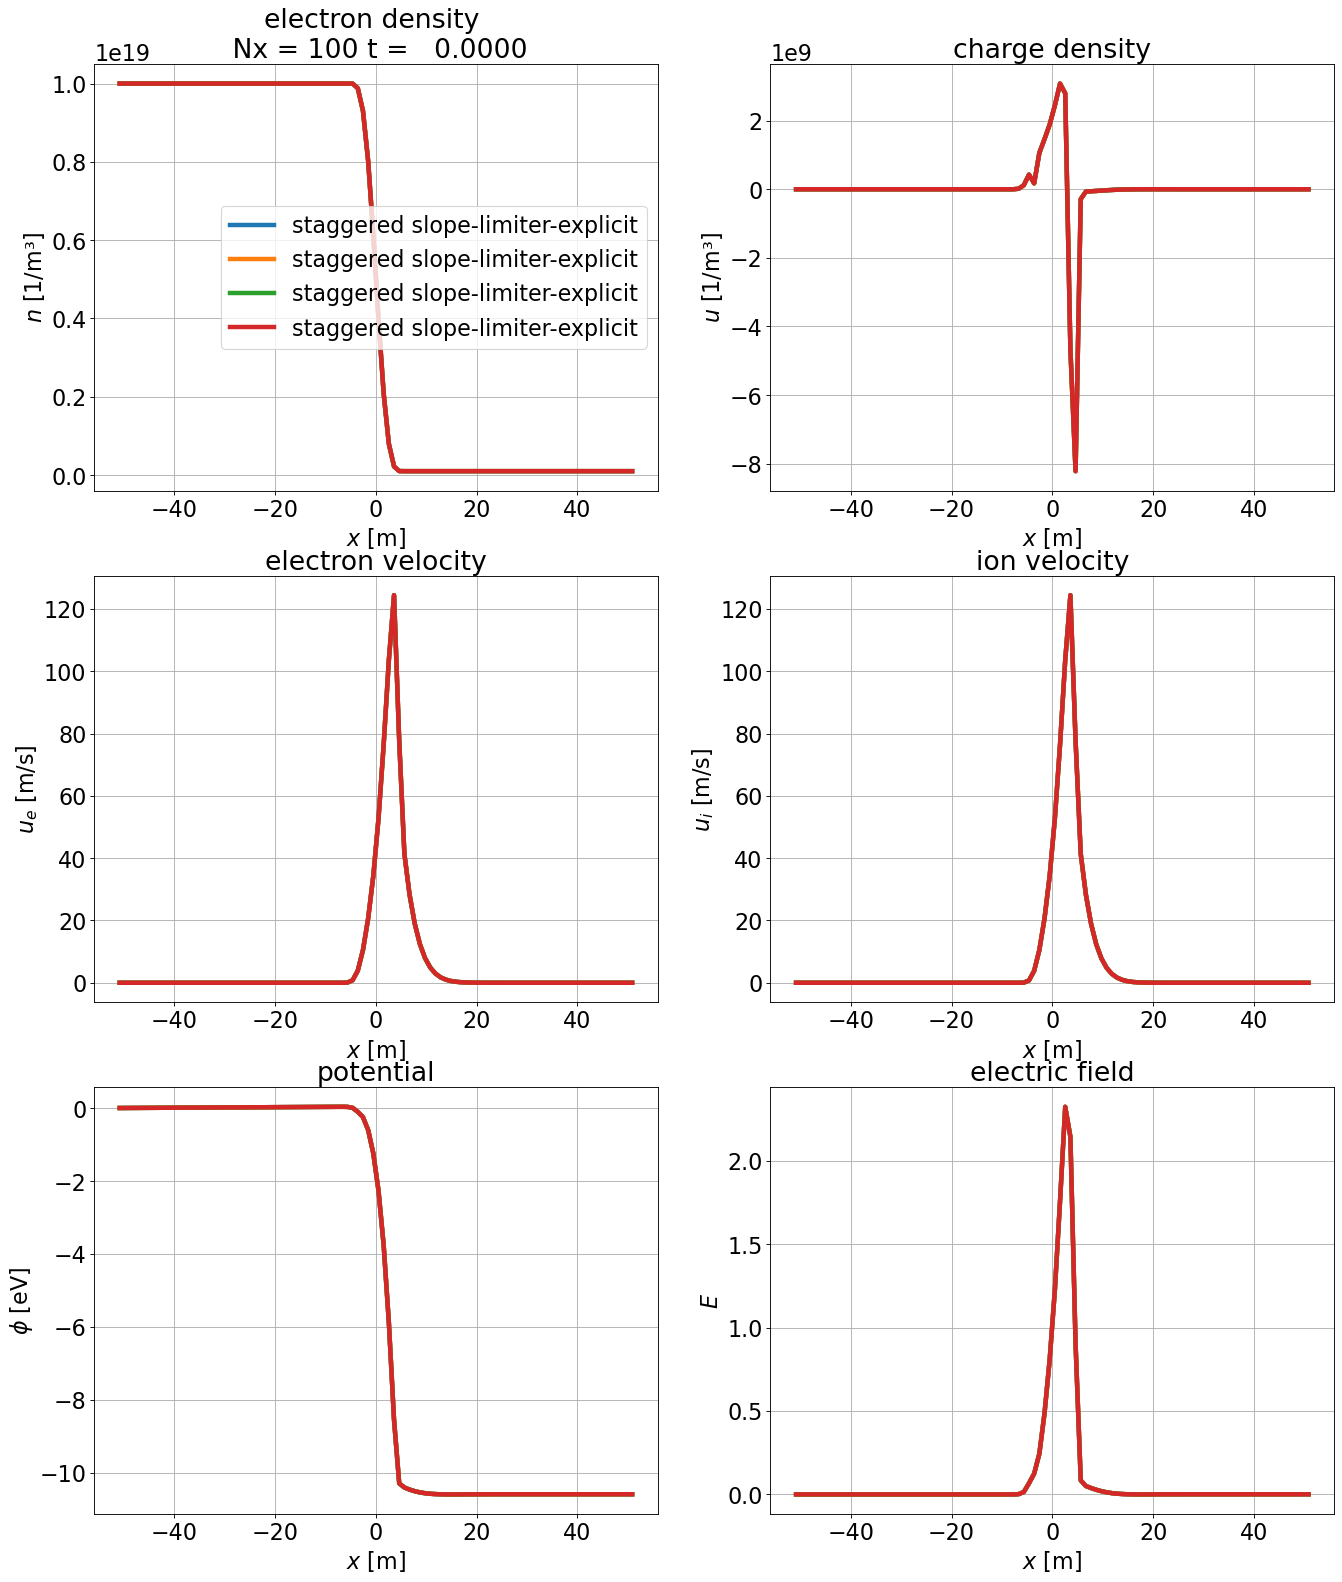

In [15]:
# ----- Simulering for ikke-adiabatiske elektroner -----
params11 = params1
p_list = []
for p in [ # Nedenstående refererer til "advection" i [2]
    {"type" : "staggered", "variant" : "original"},
    {"type" : "staggered", "variant" : "slope-limiter"},
    {"type" : "staggered", "variant" : "explicit"},
    {"type" : "staggered", "variant" : "slope-limiter-explicit"},
#     {"type" : "centered"},
         ] :
    params11["advection"] = p
    p_list.append(params11)
plot_plasma(p_list)

plt.savefig('/media/sf_Linux_VM_shared_folder/Simuleringsdata/Non_adiabatic('+fileName+').png')

We observe
- steps in the potential
- oscillations in the electron velocity and electric field indicating rapid plasma oscillations

staggered slope-limiter-explicit
Function Calls is 8377.0 Failed 723.0
staggered slope-limiter-explicit
Function Calls is 8377.0 Failed 723.0


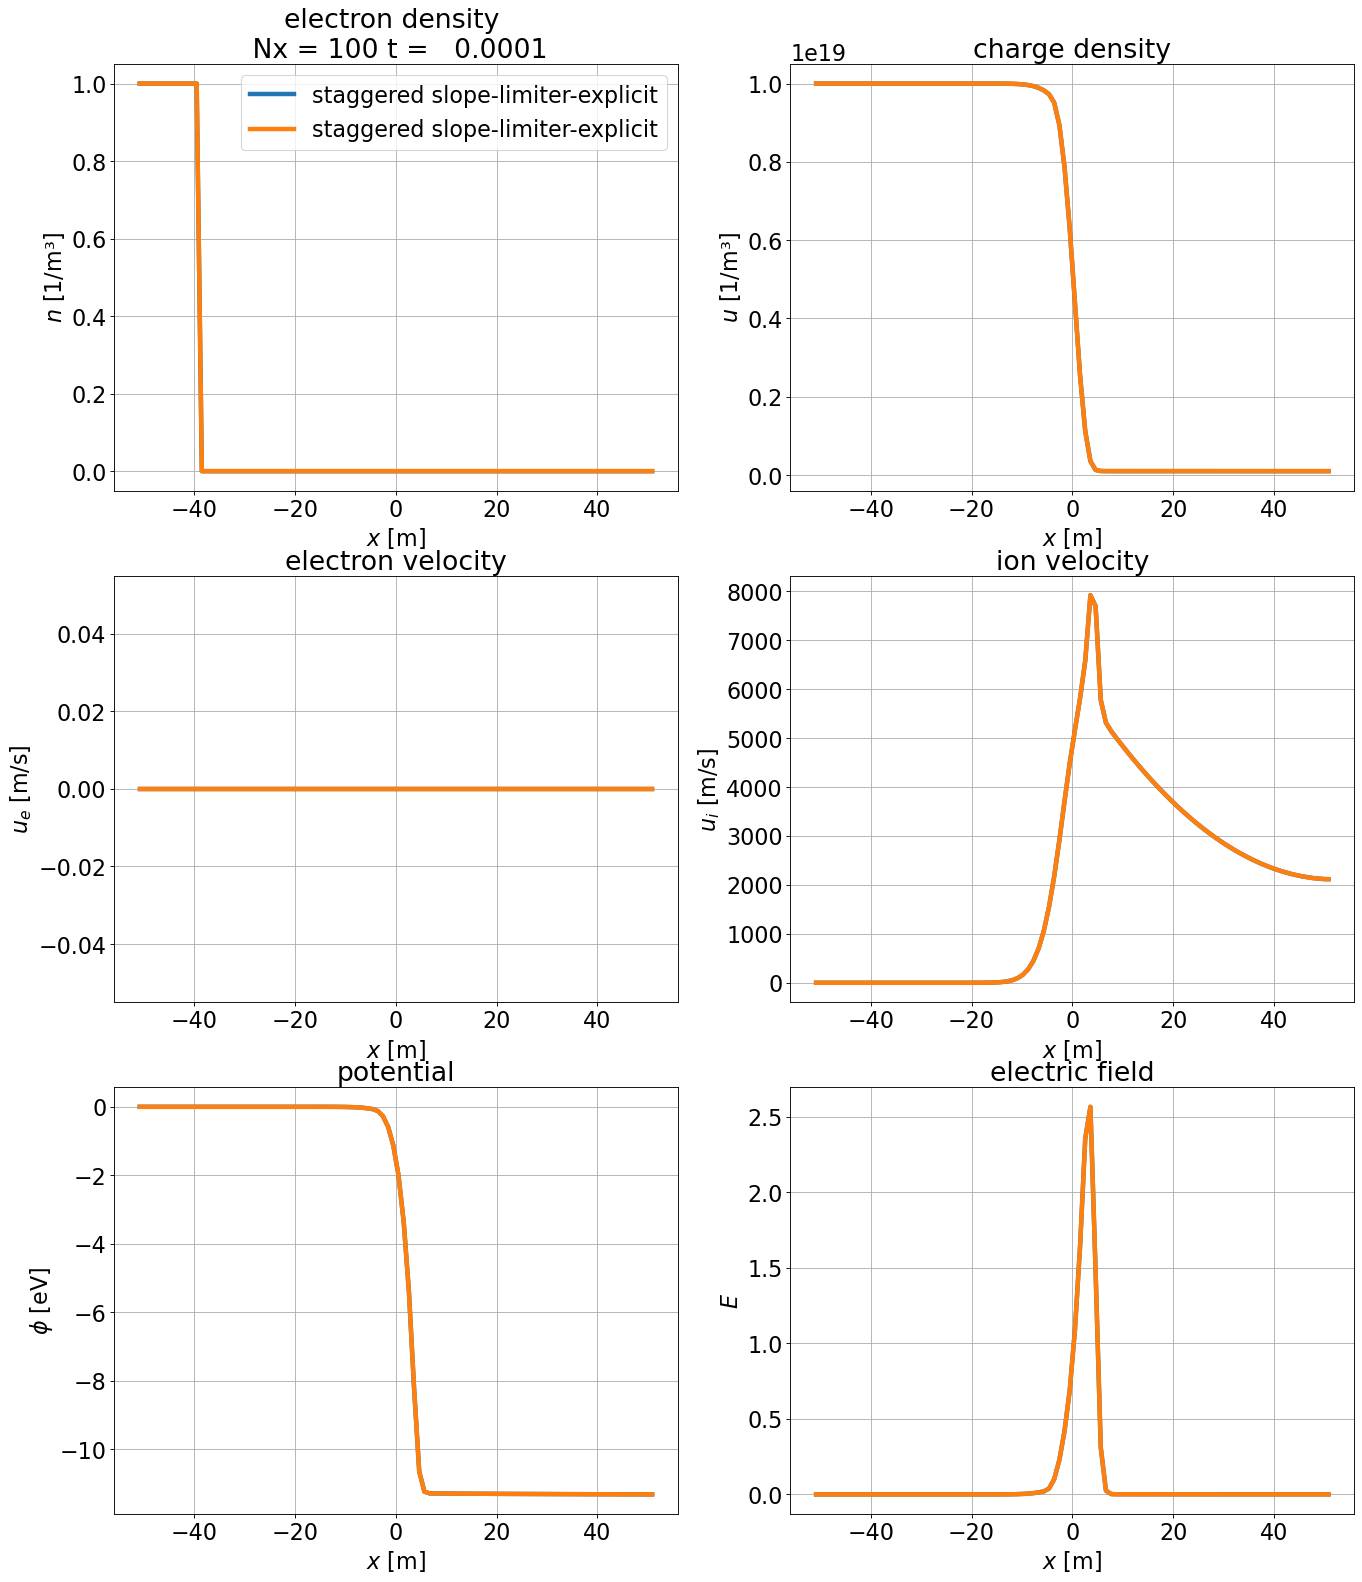

In [16]:
# ----- Simulering for adiabatiske elektroner -----

# Let us try adiabatic electrons
params21 = params2

p_list = []
for p in [
#     {"type" : "staggered", "variant" : "original"},
    {"type" : "staggered", "variant" : "slope-limiter"},
#     {"type" : "staggered", "variant" : "explicit"},
    {"type" : "staggered", "variant" : "slope-limiter-explicit"},
#     {"type" : "centered"},
         ] :
    params21["advection"] = p
    p_list.append(params21) # Original = params
plot_plasma(p_list)
plt.savefig('/media/sf_Linux_VM_shared_folder/Simuleringsdata/Adiabatic('+fileName+').png')

In [17]:
# The mms method is to check that all terms are implemented correctly
p_list = []
for p in [
    {"type" : "staggered", "variant" : "original"},
    {"type" : "staggered", "variant" : "slope-limiter"},
    {"type" : "staggered", "variant" : "slope-limiter-explicit"},
    {"type" : "centered"},
         ] :
    for Nx in [100,200,400]:#,800,1600,3200]:
            # Her kan vi igen ændre parametetrværdierne som vil bruges i denne simulering
        params = make_plasma_input(table)
        params["grid"]["Nx"]= Nx
        params["grid"]["x"] = [0.0,1.0]
        params["output"]["tend"] = 1e-3
        params["init"] = {
             # Manufactured solution without shock
            "type" : "mms",
            "n_0" : 1.0,
            "u_0" : 0.5,
            "A" : 0.2,
            "B" : 0.1,
            "k" : 4*np.pi,
            "v" : 1.0
        }
        params["bc"] = {"density":"PER", "velocity" : "PER",
                        "potential" : "PER"}
        params["physical"]["nu_u"] = [0.0,0.0]
        params["timestepper"]["type"] = "ARK"
        params["timestepper"]["tableau"]  = "ARK-4-2-3"
        params["poisson"]["eps"] = 1e-8
        params["timestepper"]["rtol"] = 1e-7
        params["timestepper"]["atol"] = 1e-7
        params["advection"] = p
        rep.clean()
        rep.run( params)
        ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
        var = ncin.variables
        last_idx  = var["time"].shape[0]-1
        
        error = var["electrons"][:,:] - var["electrons_ana"][:,:]
        norm_ana = np.linalg.norm( var["electrons_ana"][last_idx,:], ord=2)
        error_ne = np.linalg.norm(error[last_idx,:],ord=2)/norm_ana
        
        error = var["ue"][:,:] - var["ue_ana"][:,:]
        norm_ana = np.linalg.norm( var["ue_ana"][last_idx,:], ord=2)
        error_ue = np.linalg.norm(error[last_idx,:], ord=2)/norm_ana
        
        error = var["potential"][:,:] - var["potential_ana"][:,:]
        norm_ana = np.linalg.norm( var["potential_ana"][last_idx,:], ord=2)
        error_phi = np.linalg.norm(error[last_idx,:], ord=2)/norm_ana
        #norm_ana = np.size( error[last_idx,:])
        l = f"{params['advection']['type']}"
        if( "variant" in params["advection"].keys() ):
            l = l + f" {params['advection']['variant']}"
        print( f"{l} {Nx} {error_ne}\t{error_ue}\t{error_phi}")
        ncin.close()

staggered original 100 3.925112155538843e-05	0.013240711073325319	0.15622242057575791
staggered original 200 1.973248722970315e-05	0.006730562690306146	0.07833241993383158
staggered original 400 9.890376290466787e-06	0.003391235160709784	0.03922325003908412
staggered slope-limiter 100 8.955486274817162e-06	0.0011977114329689538	0.008677701589110985
staggered slope-limiter 200 2.6941101931926786e-06	0.0003082226589115833	0.002160786858264941
staggered slope-limiter 400 7.356356287798758e-07	7.797325731873192e-05	0.0005389104684716586
staggered slope-limiter-explicit 100 8.955485879467387e-06	0.0011977115118013777	0.008677709221079397
staggered slope-limiter-explicit 200 2.694109255366949e-06	0.0003082228395686528	0.002160796423278759
staggered slope-limiter-explicit 400 7.356334781708055e-07	7.797345674560438e-05	0.0005389204012663946
centered 100 2.5887931783981446e-06	0.0010831761162302855	0.013865376351620013
centered 200 6.469536099354508e-07	0.0002710056688941812	0.0034599328515985

In [18]:
# Laver funktion for simulering af video

def video_plasma(parameters):
    
    # Run simulation
    rep.clean()
    rep.run( parameters, error="display", stdout="ignore")
    ncin = Dataset( "temp.nc", 'r', format="NETCDF4") # Loader temp.nc vha. netCDF4
    var = ncin.variables # Henter fysiske parametre fra temp.nc

    frows = 2
    fcols = 3

    fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')

    x = var["x"][:] * rho_s              # Skalerer rummet
    time = ncin["time"][:] * omega_0_inv # Skalerer tiden

    ax[0][0].set_xlabel( r"$x$ [m]")
    ax[0][0].set_ylabel("n [1/m³]")
    #ax[0][0].set_ylim(0,np.max(var["electrons"][0,:]))
    ax[0][0].set_ylim(-0.05*1e19,1.1*1e19)            # Skaleret 
    ax[0][0].grid()

    ax[1][0].set_title( f"Charge density")
    ax[1][0].set_xlabel( r"$x$ [m]")
    ax[1][0].set_ylabel("u")
    if parameters["physical"]["type"] == "adiabatic" :
        chargeMax = np.max(np.abs((var["ions"][:,:]-np.exp( var["potential"][:,:])))) * 1e19 # Skaleret
    else:
        chargeMax = np.max(np.abs((var["ions"][:,:]-var["electrons"][:,:]))) * 1e19 # Skaleret
    ax[1][0].set_ylim(-1.1*chargeMax, 1.1*chargeMax)
    ax[1][0].grid()

    ax[0][1].set_title( f"Electron velocity")
    ax[0][1].set_xlabel( r"$x$ [m]")
    ax[0][1].set_ylabel( r"$u_e$ [m/s]")
    ueMax = np.max(np.abs(var["ue"][:,:])) *  c_s # Skaleret
    ax[0][1].set_ylim(-1.1*ueMax, 1.1*ueMax)
    ax[0][1].grid()

    ax[1][1].set_title( f"Ion velocity")
    ax[1][1].set_xlabel( r"$x$ [m]")
    ax[1][1].set_ylabel( r"$u_i$ [m/s]")
    uiMax = np.max(var["ui"][:,:]) * c_s # Skaleret
    ax[1][1].set_ylim(-0.05*uiMax, 1.1*uiMax)
    ax[1][1].grid()

    ax[0][2].set_title( f"Potential")
    ax[0][2].set_xlabel( r"$x$ [m]")
    ax[0][2].set_ylabel( r"$E$ [eV]")
    potMax = np.max(np.abs(var["potential"][:,:])) * Phi_0 # Skaleret
    ax[0][2].set_ylim(-1.1*potMax, 0.05*potMax) 
    ax[0][2].grid()

    ax[1][2].set_title( f"Electric field")
    ax[1][2].set_xlabel( r"$x$ [m]")
    ax[1][2].set_ylabel( r"$E$") 
    fieldMax = np.max(-np.gradient(var["potential"][parameters['grid']['Nx']/2,:] * Phi_0, x)) # Skaleret
    ax[1][2].set_ylim(-0.05*fieldMax, 1.1*fieldMax) 
    ax[1][2].grid()

    # Alle er skaleret: 
    ax[0][0].set_title( f"Electron density \n Nx = {parameters['grid']['Nx']} t = {time[0]:5.3f}")   
    if parameters["physical"]["type"] == "adiabatic" :
        electrons = np.exp( var["potential"][0 ,:]) 
        im0, = ax[0][0].plot( x, electrons*1e19, lw=4)                  # Skaleret
        im1, = ax[1][0].plot( x, (var["ions"][0,:]-electrons)*1e19, lw=4) # Skaleret
    else:
        im0, = ax[0][0].plot( x, var["electrons"][0,:] * 1e19, lw=4)
        im1, = ax[1][0].plot( x, (var["ions"][0,:]-var["electrons"][last_idx,:]) * 1e19, lw=4)
    im2, = ax[0][1].plot( x, var["ue"][0,:] * c_s, lw=4)
    im3, = ax[1][1].plot( x, var["ui"][0,:] * c_s, lw=4)
    potential = var["potential"][0,:] * Phi_0
    im4, = ax[0][2].plot( x, potential, lw=4)
    electric = -np.gradient(potential * Phi_0, x)      # Skaleret
    im5, = ax[1][2].plot( x, electric, lw=4)
    # ax[0][0].legend()

    frames = parameters["output"]["maxout"]
    def animate_expansion(iter):
        ax[0][0].set_title( f"Electron density \n Nx = {parameters['grid']['Nx']} t = {time[iter]:5.3f}")
        if parameters["physical"]["type"] == "adiabatic" :
            electrons = np.exp( var["potential"][iter ,:]) 
            im0.set_data( x, electrons*1e19)                     # Skaleret
            im1.set_data( x, (var["ions"][iter,:]-electrons)*1e19) # Skaleret
        else:
            im0.set_data( x, var["electrons"][iter,:] * 1e19)
            im1.set_data( x, (var["ions"][iter,:]-var["electrons"][iter,:]) * 1e19)
        im2.set_data( x, var["ue"][iter,:] * c_s)
        im3.set_data( x, var["ui"][iter,:] * c_s)
        potential = var["potential"][iter,:] * Phi_0
        im4.set_data( x, potential)
        electric = -np.gradient(potential, x)
        im5.set_data( x, electric)
        return ax

    ani = animation.FuncAnimation(fig,animate_expansion,frames=frames,interval=2,blit=True,repeat=True)
    # plt.show()
    writer = animation.writers['ffmpeg'](fps=50)

    if parameters["physical"]["type"] == "adiabatic" :
        simName = "adiabatic_plasma_expansion"
    else:
        simName = "plasma_expansion"
    ani.save('/media/sf_Linux_VM_shared_folder/Simuleringsdata/'+simName+'('+fileName+').mp4',writer=writer,dpi=100)
    ncin.close()

In [19]:
rep.clean()
rep.run( params2, error="display", stdout="ignore")
ncin = Dataset( "temp.nc", 'r', format="NETCDF4") # Loader temp.nc vha. netCDF4
var = ncin.variables # Henter fysiske parametre fra temp.nc


electrons = np.exp( var["potential"][: , 50]) # HVORDAN SKAL DENNE SKALERES???
print(electrons)
print(var["ions"][: ,50])
print((var["ions"][: ,50]-electrons)*1e19) # MANGLER SKALERING

[0.39779508082372506 0.39779777812315736 0.3978068112802232
 0.3978241812631787 0.3978516007120232 0.3978902112625946
 0.39794070049097024 0.3980034485772338 0.3980786357061194
 0.3981663132629691 0.3982664495062362 0.39837895874327117
 0.3985037201651185 0.39864059024893145 0.3987894110052649
 0.3989500156040418 0.39912223222777937 0.39930588675809486
 0.3995008046378835 0.39970681213974746 0.3999237368142351
 0.40015140864437726 0.40038966075009175 0.4006383295098519
 0.4008972546917497 0.4011662795346979 0.40144525074030696
 0.40173401848658524 0.4020324363590376 0.40234036130905865
 0.40265765356574873 0.4029841765530273 0.40331979679304786
 0.4036643838044142 0.40401781001426657 0.4043799506393051
 0.4047506835893172 0.4051298893789237 0.4055174510113503
 0.4059132538976298 0.4063171857629249 0.40672913653850107
 0.4071489982918392 0.4075766651463788 0.4080120331766344
 0.4084550003650375 0.40890546649598136 0.40936333310706935
 0.40982850340649657 0.4103008822044314 0.41078037586

<IPython.core.display.Javascript object>


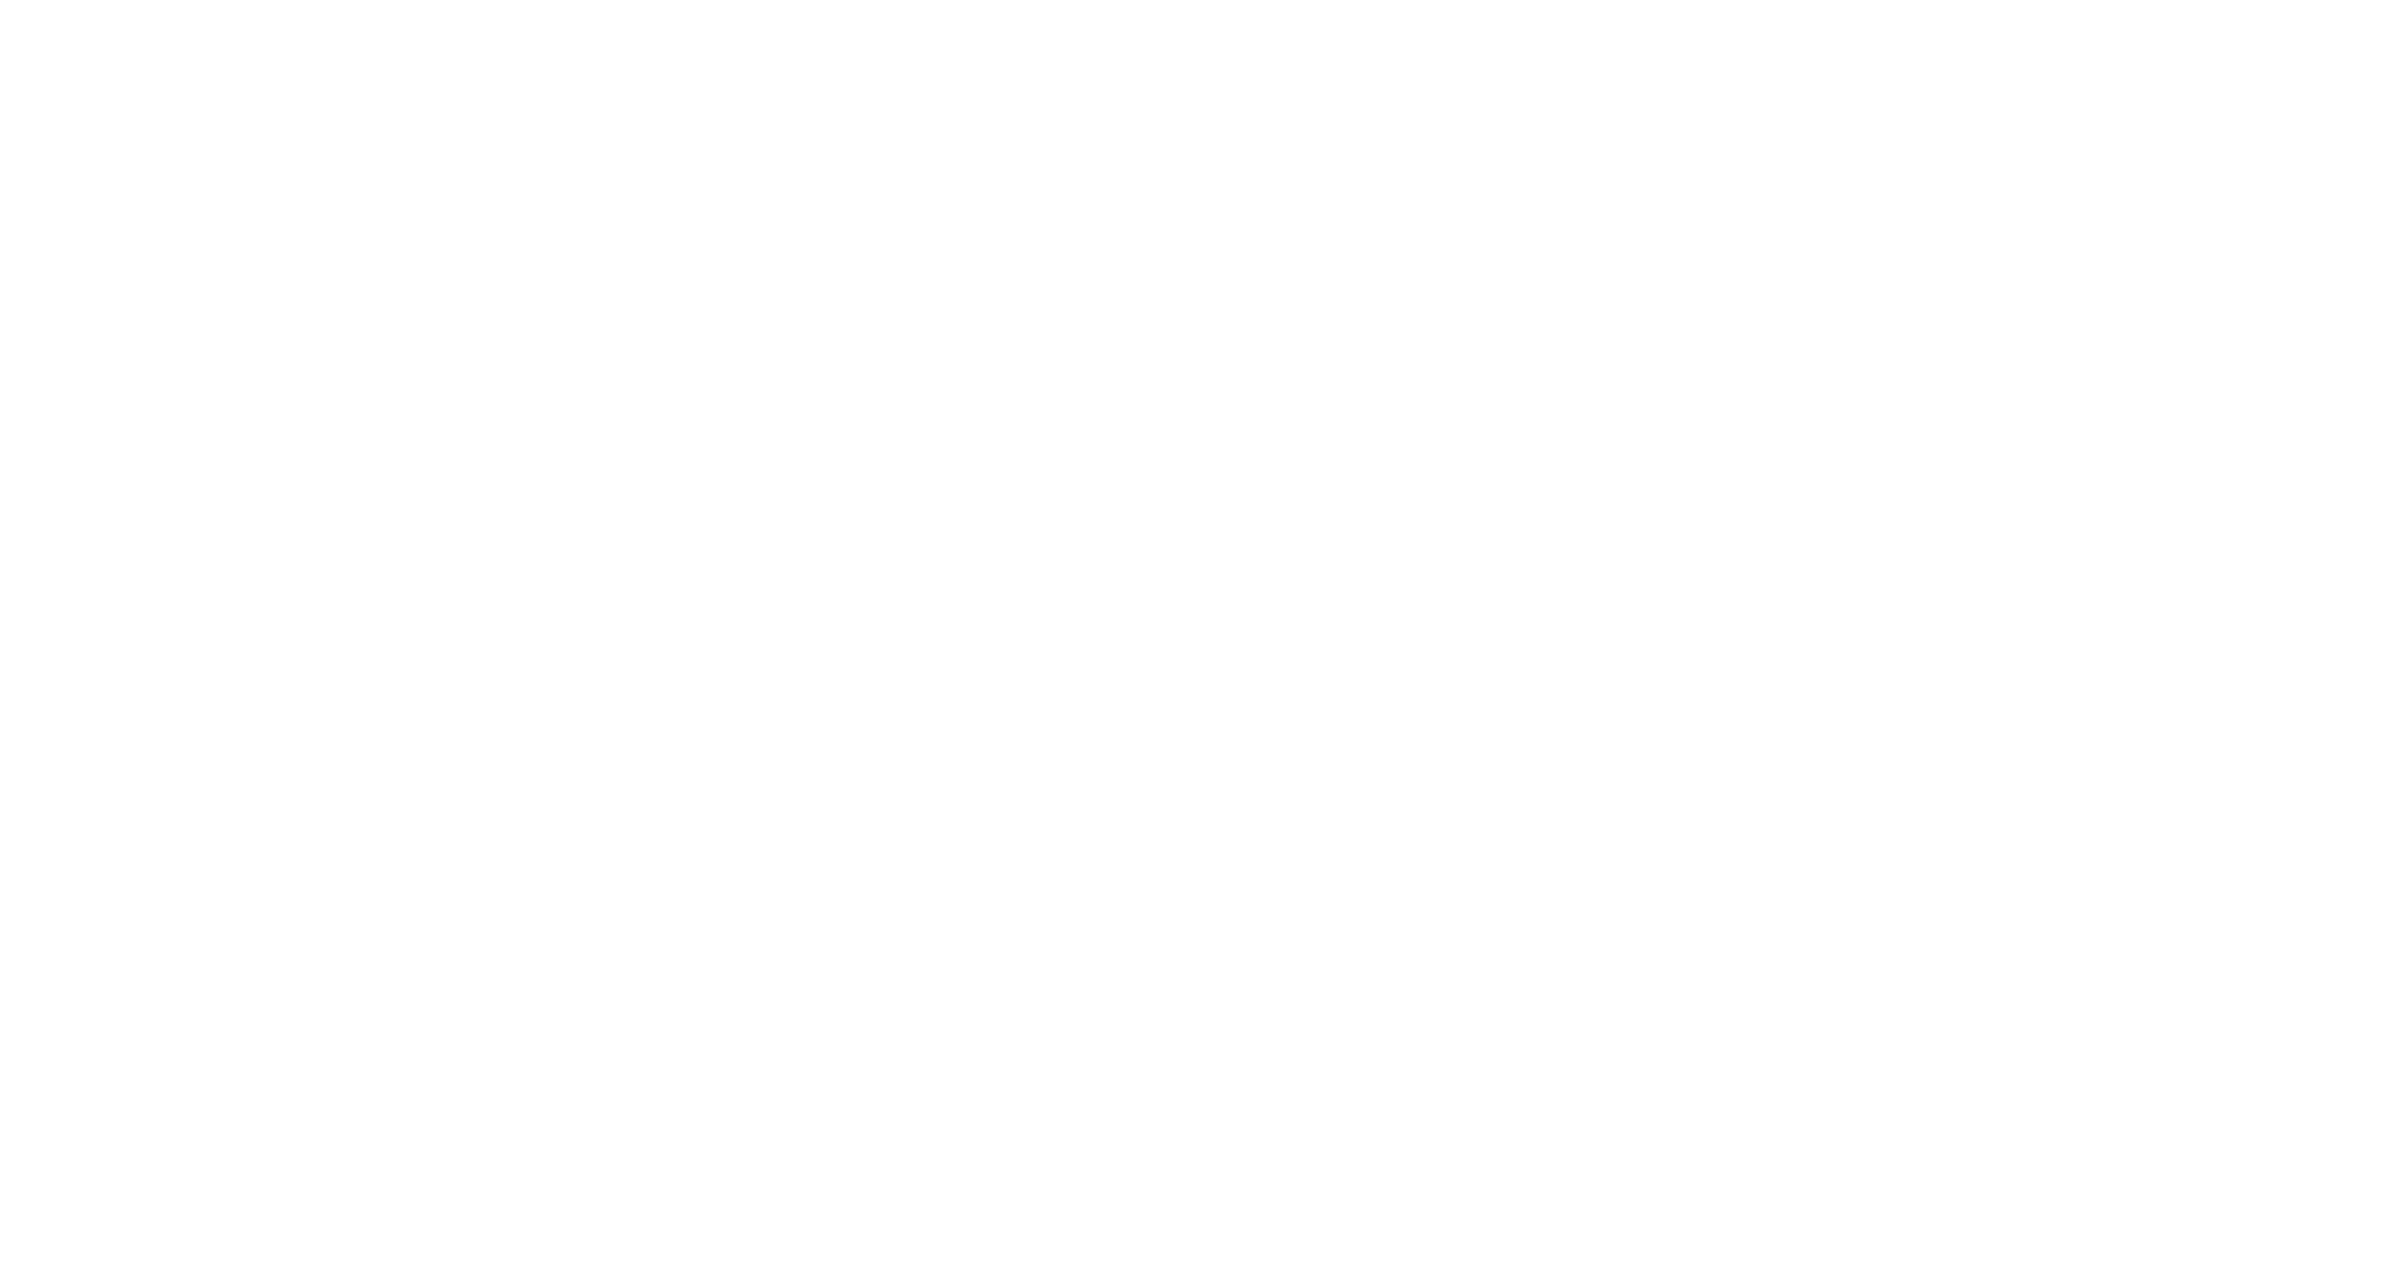

In [20]:
# ----- Simulerer video for ikke-adiabatiske elektroner -----
%matplotlib notebook

video_plasma(params1)



<IPython.core.display.Javascript object>


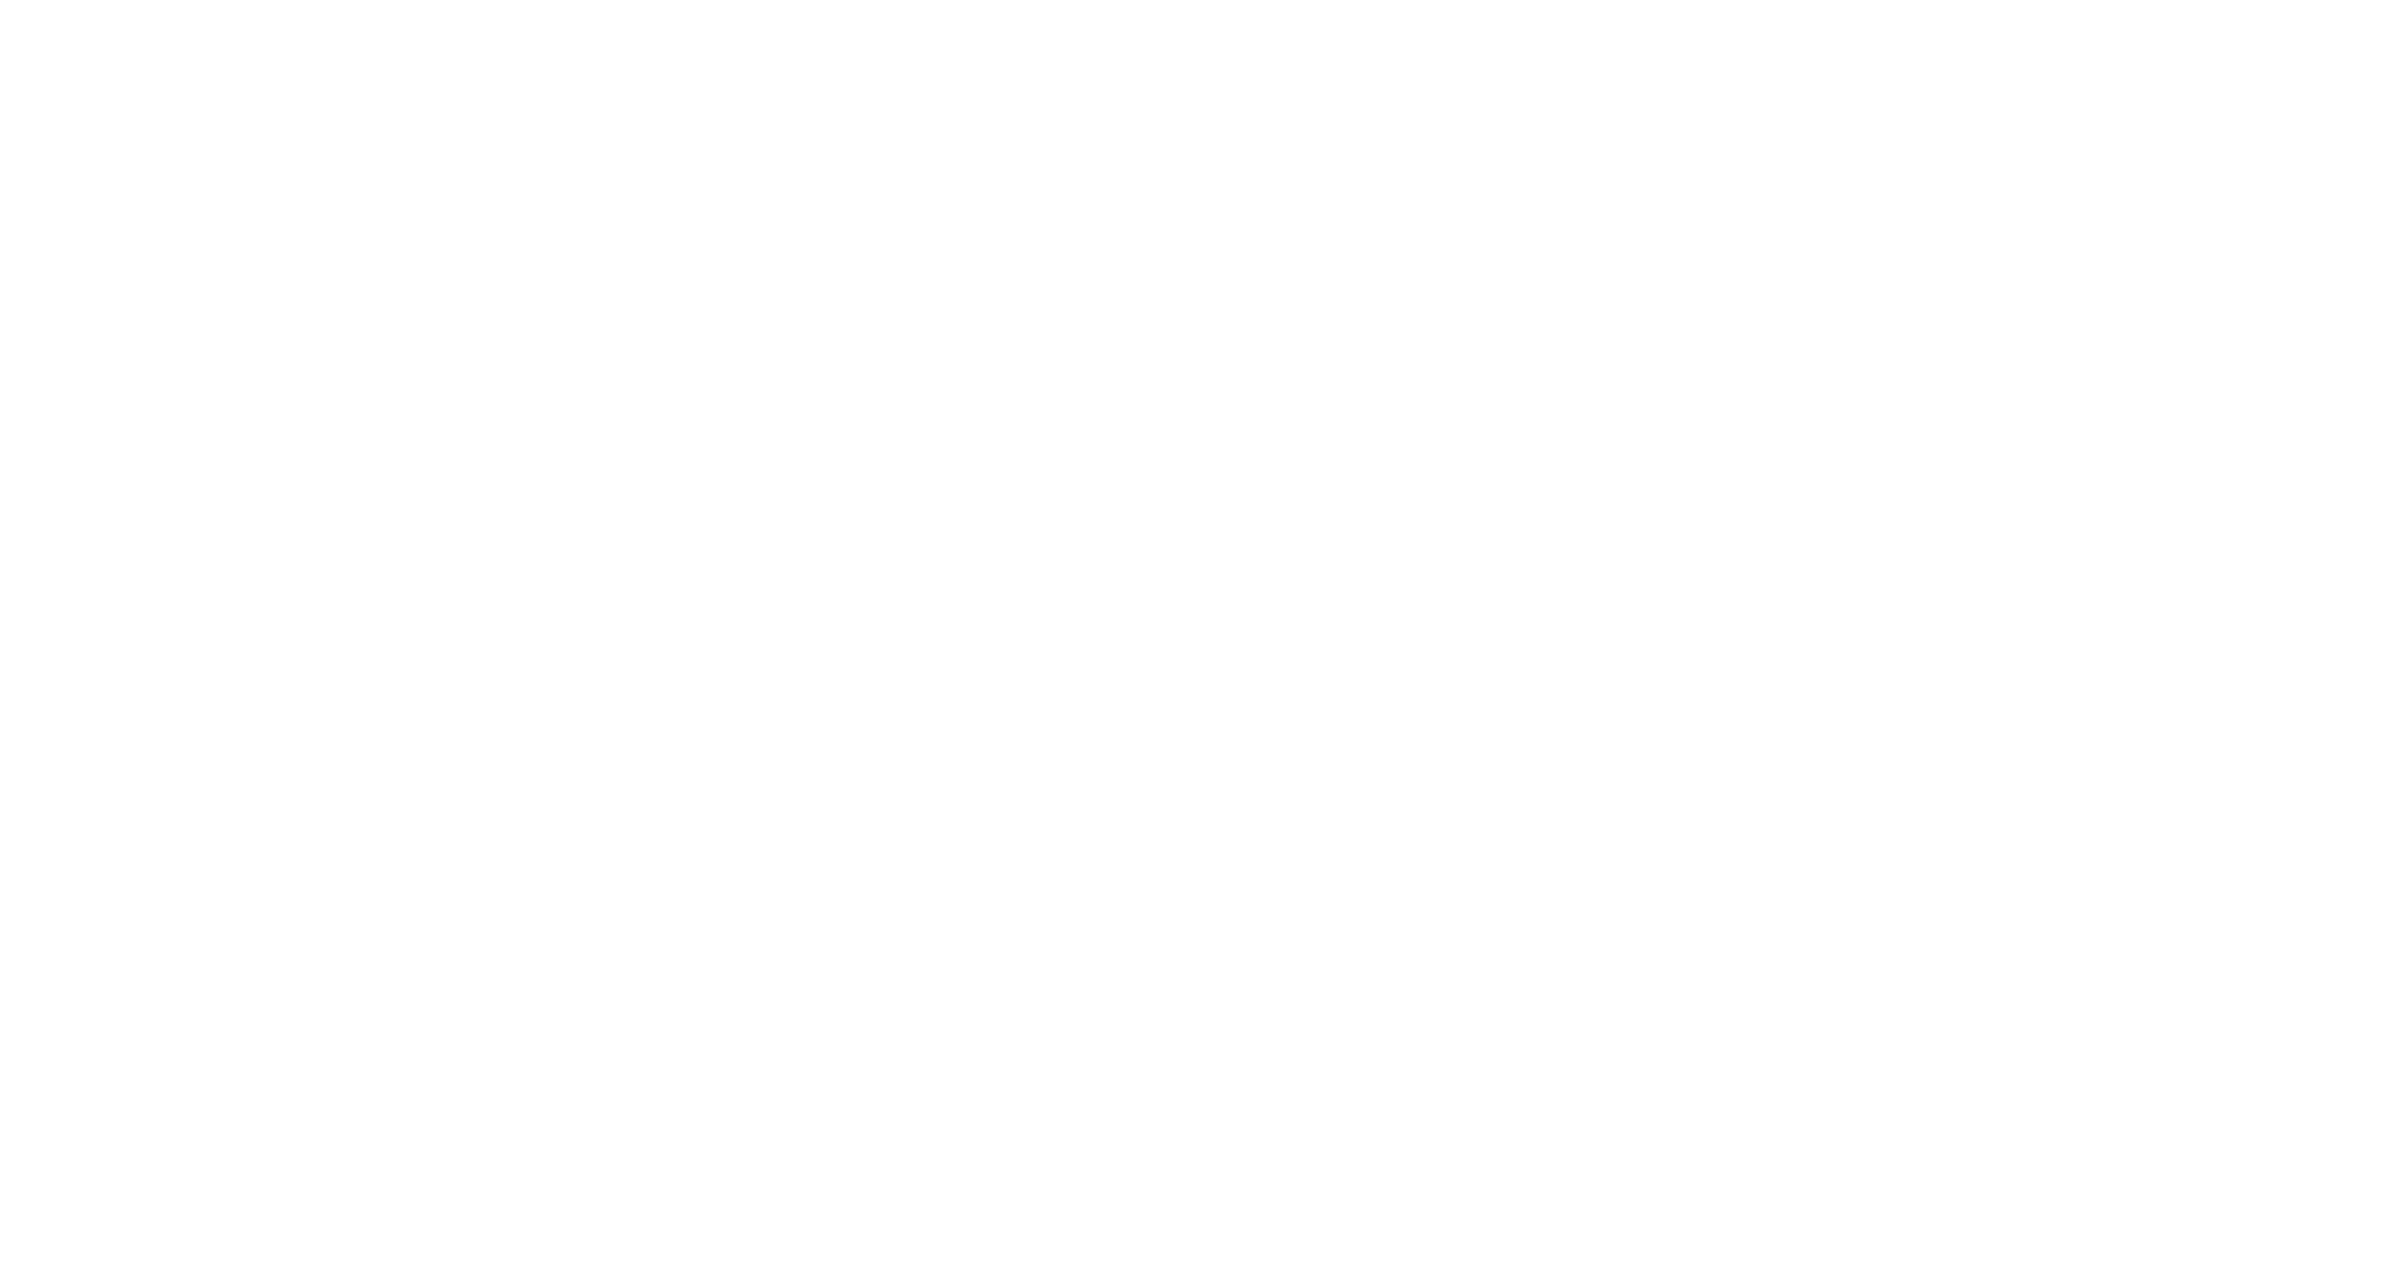

<ipython-input-18-c759a0878319>:39: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax[0][1].set_ylim(-1.1*ueMax, 1.1*ueMax)


In [21]:
# ----- Simulerer video for adiabatiske elektroner -----
%matplotlib notebook

video_plasma(params2)


In [22]:
rep.clean()
rep.run( params2, error="display", stdout="ignore") # Original=params
ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
var = ncin.variables

# HVORFOR ER DISSE IKKE ENS? 
print(np.exp( var["potential"][:,:] * Phi_0))
print(np.exp( var["potential"][:,:])*1e19)
ncin.close() 

[[1.0 1.0 1.0 ... 1.2077297576836236e-05 1.2077297576836236e-05
  1.2077297576836236e-05]
 [1.0 1.0 1.0 ... 1.2077297576836236e-05 1.2077297576836236e-05
  1.2077297576836236e-05]
 [1.0 1.0 1.0 ... 1.2077297576836236e-05 1.2077297576836236e-05
  1.2077297576836236e-05]
 ...
 [1.0 1.0 1.0 ... 1.209276586564139e-05 1.2087691094540034e-05
  1.2082540386358442e-05]
 [1.0 1.0 1.0 ... 1.2093038404566214e-05 1.2087877487314741e-05
  1.2082636098798989e-05]
 [1.0 1.0 1.0 ... 1.209330362207246e-05 1.2088070109812917e-05
  1.2082729481916302e-05]]
[[1e+19 1e+19 1e+19 ... 1.0000000000000003e+17 1.0000000000000003e+17
  1.0000000000000003e+17]
 [1e+19 1e+19 1e+19 ... 1.0000000000000003e+17 1.0000000000000003e+17
  1.0000000000000003e+17]
 [1e+19 1e+19 1e+19 ... 1.0000000000000003e+17 1.0000000000000003e+17
  1.0000000000000003e+17]
 ...
 [1e+19 1e+19 1e+19 ... 1.00052065059796e+17 1.00034988131724e+17
  1.0001765132018398e+17]
 [1e+19 1e+19 1e+19 ... 1.0005298205032162e+17 1.0003561543052909e+17
 

# ----- Simulerer video for ikke-adiabatiske elektroner -----

%matplotlib notebook

# Run simulation
rep.clean()
rep.run( params1, error="display", stdout="ignore")
ncin = Dataset( "temp.nc", 'r', format="NETCDF4") # Loader temp.nc vha. netCDF4
var = ncin.variables # Henter fysiske parametre fra temp.nc

fileName = "Test2"

frows = 2
fcols = 3

fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')

x = var["x"][:] * rho_s              # Skalerer rummet
time = ncin["time"][:] * omega_0_inv # Skalerer tiden

ax[0][0].set_xlabel( r"$x$ [m]")
ax[0][0].set_ylabel("n [1/m³]")
#ax[0][0].set_ylim(0,np.max(var["electrons"][0,:]))
ax[0][0].set_ylim(0,1.1*1e19)
ax[0][0].grid()

ax[1][0].set_title( f"charge density")
ax[1][0].set_xlabel( r"$x$ [m]")
ax[1][0].set_ylabel("u")
chargeMax = np.max(np.abs((var["ions"][:,:]-var["electrons"][:,:]))) * 1e19 # Skaleret
ax[1][0].set_ylim(-1.1*chargeMax, 1.1*chargeMax)
#ax[1][0].set_ylim(-4e-9, 4e-9)
ax[1][0].grid()

ax[0][1].set_title( f"electron velocity")
ax[0][1].set_xlabel( r"$x$ [m]")
ax[0][1].set_ylabel( r"$u_e$ [m/s]")
ueMax = np.max(np.abs(var["ue"][:,:])) *  c_s # Skaleret
ax[0][1].set_ylim(-1.1*ueMax, 1.1*ueMax)
# ax[0][1].set_ylim(-2e-3, 2e-3)
ax[0][1].grid()

ax[1][1].set_title( f"ion velocity")
ax[1][1].set_xlabel( r"$x$ [m]")
ax[1][1].set_ylabel( r"$u_i$ [m/s]")
uiMax = np.max(var["ui"][:,:]) * c_s # Skaleret
ax[1][1].set_ylim(0, 1.1*uiMax)
#ax[1][1].set_ylim(0, 3e-4)
ax[1][1].grid()

ax[0][2].set_title( f"potential")
ax[0][2].set_xlabel( r"$x$ [m]")
ax[0][2].set_ylabel( r"$E$ [eV]")
potMax = np.max(np.abs(var["potential"][:,:])) * Phi_0 # Skaleret
ax[0][2].set_ylim(-1.1*potMax, 0) 
# ax[0][2].set_ylim(-1.8, 0)# Original:(-5,0)
ax[0][2].grid()

ax[1][2].set_title( f"electric field")
ax[1][2].set_xlabel( r"$x$ [m]")
ax[1][2].set_ylabel( r"$E$") 
fieldMax = np.max(-np.gradient(var["potential"][params1['grid']['Nx']/2,:] * Phi_0, x)) # Skaleret
ax[1][2].set_ylim(0, 1.1*fieldMax) 
#ax[1][2].set_ylim(0, 6e-3)  
ax[1][2].grid()

# Alle er skaleret: 
ax[0][0].set_title( f"electron density \n Nx = {params1['grid']['Nx']} t = {time[0]:5.3f}")   
im0, = ax[0][0].plot( x, var["electrons"][0,:] * 1e19, lw=4)
im1, = ax[1][0].plot( x, (var["ions"][0,:]-var["electrons"][last_idx,:]) * 1e19, lw=4)
im2, = ax[0][1].plot( x, var["ue"][0,:] * c_s, lw=4)
im3, = ax[1][1].plot( x, var["ui"][0,:] * c_s, lw=4)
potential = var["potential"][0,:] * Phi_0
im4, = ax[0][2].plot( x, potential, lw=4)
electric = -np.gradient(potential, x)
im5, = ax[1][2].plot( x, electric, lw=4)
# ax[0][0].legend()

frames = params1["output"]["maxout"]
def animate_expansion(iter):
    ax[0][0].set_title( f"electron density \n Nx = {params1['grid']['Nx']} t = {time[iter]:5.3f}")
    im0.set_data (x, var["electrons"][iter,:] * 1e19)
    im1.set_data( x, (var["ions"][iter,:]-var["electrons"][iter,:]) * 1e19)
    im2.set_data( x, var["ue"][iter,:] * c_s)
    im3.set_data( x, var["ui"][iter,:] * c_s)
    potential = var["potential"][iter,:] * Phi_0
    im4.set_data( x, potential)
    electric = -np.gradient(potential, x)
    im5.set_data( x, electric)
    return ax

ani = animation.FuncAnimation(fig,animate_expansion,frames=frames,interval=2,blit=True,repeat=True)
# plt.show()
writer = animation.writers['ffmpeg'](fps=50)

ani.save('/media/sf_Linux_VM_shared_folder/Simuleringsdata/plasma_expansion('+fileName+').mp4',writer=writer,dpi=100)
ncin.close()

# ----- Simulerer video for adiabatiske elektroner -----

%matplotlib notebook

# Run simulation
rep.clean()
rep.run( params2, error="display", stdout="ignore") # Original=params
ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
var = ncin.variables

frows = 2
fcols = 3
fileName = "Test 3"
fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')

x = var["x"][:] * rho_s # Skaleret
time = ncin["time"][:] * omega_0_inv # Skaleret

ax[0][0].set_xlabel( r"s [$\rho_s$]")
ax[0][0].set_ylabel("n")
ax[0][0].set_ylim(0,1.1*1e19) # Skaleret 
ax[0][0].grid()

ax[1][0].set_title( f"charge density")
ax[1][0].set_xlabel( r"s [$\rho_s$]")
ax[1][0].set_ylabel("u")
chargeMax = np.max(np.abs(var["ions"][0,:]-np.exp( var["potential"][0 ,:])))
ax[1][0].set_ylim(-1.1*chargeMax, 1.1*chargeMax)
ax[1][0].grid()

ax[0][1].set_title( f"electron velocity")
ax[0][1].set_xlabel( r"s [$\rho_s$]")
ax[0][1].set_ylabel( r"$u_e$")
ueMax = np.max(np.abs(var["ue"][:,:]))
ax[0][1].set_ylim(-1.1*ueMax,1.1*ueMax)
ax[0][1].grid()

ax[1][1].set_title( f"ion velocity")
ax[1][1].set_xlabel( r"s [$\rho_s$]")
ax[1][1].set_ylabel( r"$u_i$")
uiMax = np.max(var["ui"][:,:])
ax[1][1].set_ylim(0, 1.1*uiMax)
ax[1][1].grid()

ax[0][2].set_title( f"potential")
ax[0][2].set_xlabel( r"s [$\rho_s$]")
ax[0][2].set_ylabel( r"$E$")
potMax = np.max(np.abs(var["potential"][:,:]))
ax[0][2].set_ylim(-1.1*potMax, 0.1) 
ax[0][2].grid()

ax[1][2].set_title( f"electric field")
ax[1][2].set_xlabel( r"s [$\rho_s$]")
ax[1][2].set_ylabel( r"$E$") 
fieldMax = np.max(-np.gradient(var["potential"][0,:], x))
#fieldMax = np.max(-np.gradient(var["potential"][params2['grid']['Nx']/2,:], x))
ax[1][2].set_ylim(0, 1.1*fieldMax)      
ax[1][2].grid()

ax[0][0].set_title( f"electron density \n Nx = {params2['grid']['Nx']} t = {time[0]:5.1f}")   
electrons = np.exp( var["potential"][0 ,:])
im0, = ax[0][0].plot( x, electrons, lw=4)
im1, = ax[1][0].plot( x, var["ions"][0,:]-electrons, lw=4)
im2, = ax[0][1].plot( x, var["ue"][0,:], lw=4)
im3, = ax[1][1].plot( x, var["ui"][0,:], lw=4)
potential = var["potential"][0,:]
im4, = ax[0][2].plot( x, potential, lw=4)
electric = -np.gradient(potential, x)
im5, = ax[1][2].plot( x, electric, lw=4)

frames = params2["output"]["maxout"]
def animate_adiabatic(iter):
    ax[0][0].set_title( f"electron density \n Nx = {params2['grid']['Nx']} t = {time[iter]:5.1f}")
    electrons = np.exp( var["potential"][iter ,:])
    im0.set_data (x, electrons)
    im1.set_data( x, var["ions"][iter,:]-electrons)
    im2.set_data( x, var["ue"][iter,:])
    im3.set_data( x, var["ui"][iter,:])
    potential = var["potential"][iter,:]
    im4.set_data( x, potential)
    electric = -np.gradient(potential, x)
    im5.set_data( x, electric)
    return ax

ani = animation.FuncAnimation(fig,animate_adiabatic,frames=frames,interval=2,blit=True,repeat=True)
# plt.show()
writer = animation.writers['ffmpeg'](fps=50)

ani.save('/media/sf_Linux_VM_shared_folder/Simuleringsdata/adiabatic_plasma_expansion('+fileName+').mp4',writer=writer,dpi=100)
ncin.close()

# Bestemmer den ikke-adiabatisk Plasmafrekvens ud fra elektronhastigheden
%matplotlib notebook

# Run simulation
rep.clean()
rep.run( params1, error="display", stdout="ignore") # Original=params
ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
var = ncin.variables

x = var["x"][:]
time = ncin["time"][:]
last_idx = time.shape[0]-1
Nx = params1["grid"]["Nx"]

# FFT:
ue = var["ue"][:,Nx/2] # Finder ue i x=0 for alle t
Fue = np.fft.fft(ue)
freq = np.fft.fftfreq(time.shape[-1])
Fueabs = np.abs(Fue)
Pue = np.square(Fueabs)

# Plotter
plt.rcParams.update({'font.size': 20})
frows = 1
fcols = 3

fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')

# Plotter hele tidsperioden
ax[0].plot(time,ue, lw=4)
ax[0].set_title( f"Electron velocity Nx = {Nx} t = {time[last_idx]:8.4f}")
ax[0].set_xlabel( r"t [$s$]")
ax[0].set_ylabel("$u_e$")
ax[0].legend()
ax[0].grid()
# Her kan vi aflæse at en periode er lige under 0.004 sekunder

# Plotter en enkelt periode



#Plotter abs(FFT)
ax[1].plot(freq,Fueabs, lw=4)
ax[1].set_title( f"Electron velocity")
ax[1].set_xlabel( r" [$1/s$]")
ax[1].set_ylabel("$|u_e|$")
ax[1].grid()

#Plotter Effektspektret
ax[2].plot(freq,Pue, lw=4)
ax[2].set_title( f"Power spektrum")
ax[2].set_xlabel( r"P")
ax[2].set_ylabel("$|u_e|^2$")
ax[2].grid()


plt.savefig('/media/sf_Linux_VM_shared_folder/Simuleringsdata/Non_adiabatic_plasma_frequency('+fileName+').png')




<IPython.core.display.Javascript object>


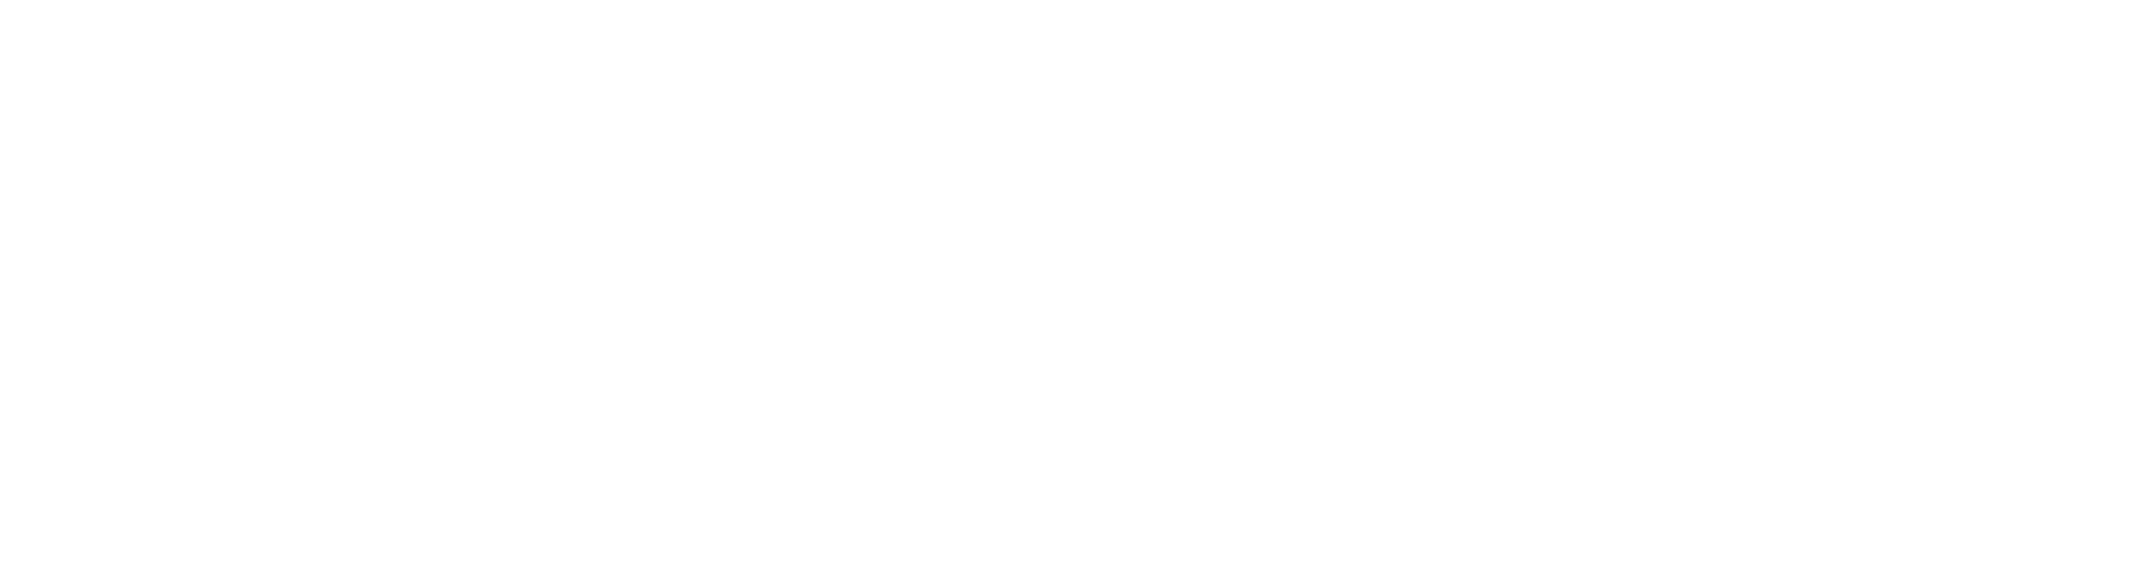

In [23]:
# Bestemmer den ikke-adiabatisk Plasmafrekvens ud fra Ladningsdensiteten
%matplotlib notebook

# Ændrer relevante simuleringsdata:
# params1["output"]["tend"] = 10
params1["output"]["maxout"] = 10000 * params1["output"]["tend"]

# fileName = "tend = " + str(params1["output"]["tend"])
# fileName = "en periode v3"

# Run simulation
rep.clean()
rep.run( params1, error="display", stdout="ignore") # Original=params
ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
var = ncin.variables


# Henter relevante konstanter og variable fra simuleringen og omskriver dem til fysiske konstanter
x = var["x"][:] * rho_s
time = ncin["time"][:] * omega_0_inv   # Skalerer tiden til at være i sekunder 
last_idx = time.shape[0]-1 
Nx = params1["grid"]["Nx"]
t_end = params1["output"]["tend"] * omega_0_inv
maxout = params1["output"]["maxout"] 
T_s = t_end/last_idx    # Sample spacing (Tiden mellem 2 værdier i tidsdomænet)


# FFT:
CD = var["ions"][:,Nx/2]-var["electrons"][:,Nx/2]    # Finder Charge density til x=0 for alle t
CD = CD * 1e19  # Skalerer charge density med densitetsskaleringen
FCD = np.fft.rfft(CD)
FCD[0] = 0 # Fjerner DC-forstyrrelsen

# FCD = np.fft.fftshift(FCD)
f = np.fft.rfftfreq(time.shape[-1],d=T_s)   # Bestemmer lineær frekvens
freq = 2*np.pi*f       # Bestemmer vinkelfrekvensen, omega
FCDabs = np.abs(FCD)
PCD = np.square(FCDabs)


# Udregner plasmafrekvensen ud fra formlen: 
epsilon_0 = params1["constants"]["epsilon_0"]
n_0 = np.mean(var["electrons"][:,Nx/2])*1e19
# n_0 = var["electrons"][1,Nx/2] * 1e19
e_V = 1.602e-19

# omega_pCal = np.sqrt(n_0/(epsilon_0*m_e))/(B_0*m_i) # Skaleret omega_p
#print(omega_pCal)
omega_pCal = np.sqrt((n_0*e_V**2)/(epsilon_0*m_e)) # Fysisk omega_p 
#print(omega_pCal)

# ----- Plotter -----
plt.rcParams.update({'font.size':20})      #Generel fontsize
#plt.rcParams.update({'axes.titlesize':20}) #fontsize of the title
frows = 1
fcols = 3
fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')


# Plotter hele tidsperioden
ax[0].plot(time,CD, lw=4)
ax[0].set_title( f" Charge density \n Nx = {Nx} t = {time[last_idx]:8.4f}")
ax[0].set_xlabel( r"t [$s$]")
ax[0].set_ylabel("$u$")
ax[0].set_xlim( [ 1e-7, 2e-7 ] )          # Plot interval
#ax[0].legend()
ax[0].grid()

#Plotter abs(FFT)
ax[1].plot(freq[0:int(0.1*maxout)],FCDabs[0:int(0.1*maxout)], lw=4)
ax[1].set_title( f"Charge density")
ax[1].set_xlabel( r"$\omega$ [rad/s]")
ax[1].set_ylabel("$u$")
ax[1].grid()
ax[1].axvline(x=omega_pCal, color = "red",linewidth=4)

#Plotter Effektspektret
ax[2].plot(freq[0:int(0.1*maxout)],PCD[0:int(0.1*maxout)], lw=4)
ax[2].set_title( f"Power spektrum")
ax[2].set_xlabel( r"$\omega$ [rad/s]")
ax[2].set_ylabel("$|u|^2$")
ax[2].grid()
ax[2].axvline(x=omega_pCal, color = "red",linewidth=4)

plt.savefig('/media/sf_Linux_VM_shared_folder/Simuleringsdata/Non_adiabatic_plasma_frequency('+fileName+').png')

<IPython.core.display.Javascript object>


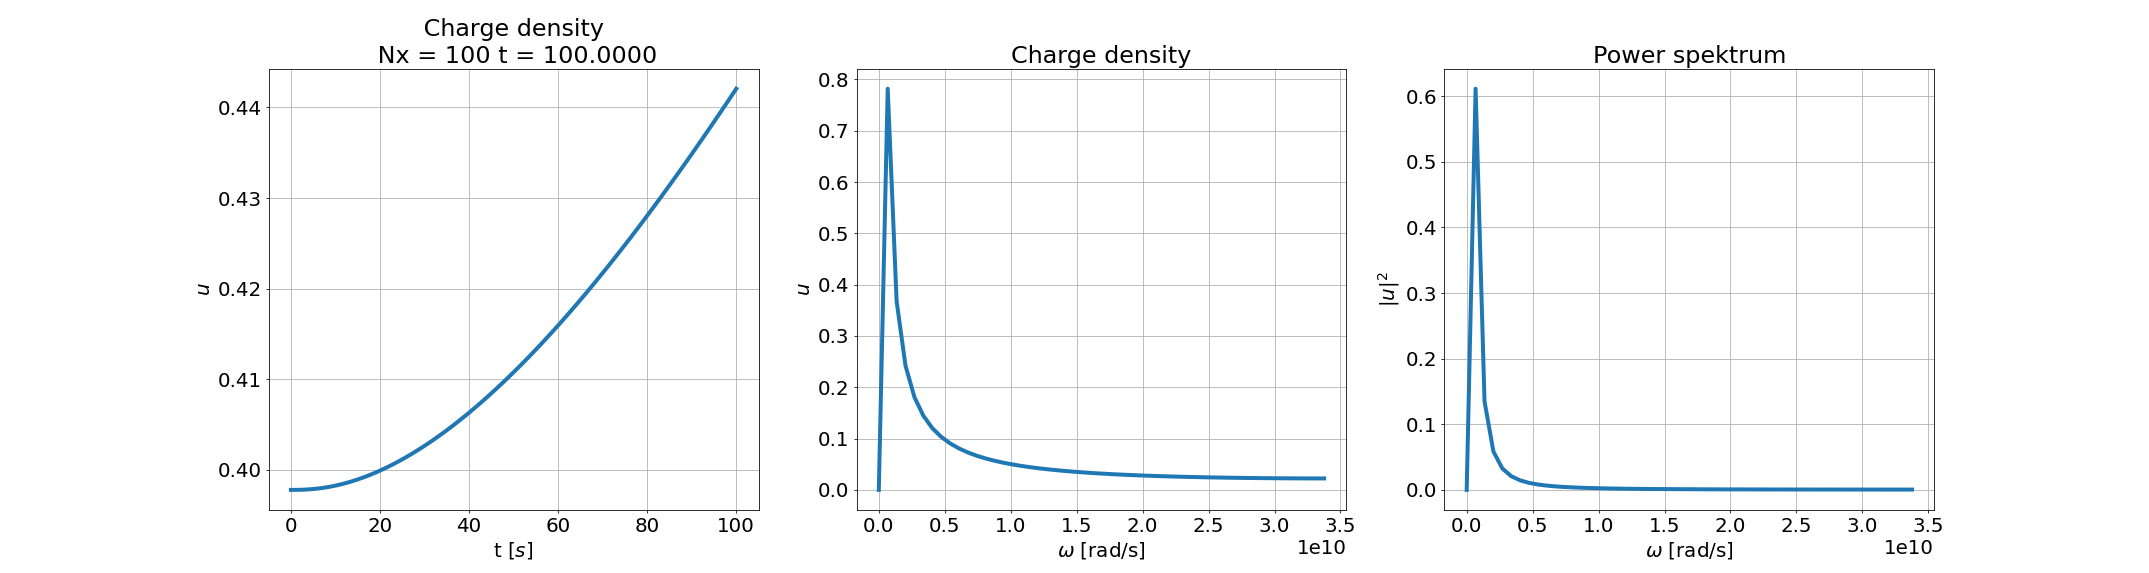

In [24]:
# Bestemmer den adiabatiske Plasmafrekvens ud fra densiteten og plotter den. 
%matplotlib notebook

# Ændrer relevante simuleringsdata:
params2["output"]["tend"] = 1e2
params2["output"]["maxout"] = 1 * params2["output"]["tend"]

# fileName = "tend = 1e5"

# Run simulation
rep.clean()
rep.run( params2, error="display", stdout="ignore") # Original=params
ncin = Dataset( "temp.nc", 'r', format="NETCDF4")
var = ncin.variables

# Henter relevante konstanter og variable fra simuleringen 
x = var["x"][:]
time = ncin["time"][:]
last_idx = time.shape[0]-1
Nx = params2["grid"]["Nx"]
t_end = params2["output"]["tend"]
maxout = params2["output"]["maxout"]
ss = t_end/last_idx    # Sample spacing (Tiden mellem 2 værdier i tidsdomænet)

#print(x)
#print(time)
#print(ss)

# FFT:
CD = var["ions"][:,Nx/2]-var["electrons"][:,Nx/2]    # Finder Charge density til x=0 for alle t
FCD = np.fft.rfft(CD)
FCD[0] = 0 # Fjerner DC-forstyrrelsen
f = np.fft.rfftfreq(time.shape[-1],d=T_s) # Bestemmer lineær frekvens
freq = 2*np.pi*f # Bestemmer vinkelfrekvensen, omega
FCDabs = np.abs(FCD)
PCD = np.square(FCDabs)

# Plotter
plt.rcParams.update({'font.size':20})
frows = 1
fcols = 3

fig,ax=plt.subplots(frows,fcols,figsize=(fcols*10,frows*8),dpi= 80, facecolor='w', edgecolor='k')

# Plotter hele tidsperioden
ax[0].plot(time,CD, lw=4)
ax[0].set_title( f" Charge density \n Nx = {Nx} t = {time[last_idx]:8.4f}")
ax[0].set_xlabel( r"t [$s$]")
ax[0].set_ylabel("$u$")
#ax[0].legend()
ax[0].grid()
# Her kan vi aflæse at en periode er lige under 0.004 sekunder

#Plotter abs(FFT)
ax[1].plot(freq[0:int(1*maxout)],FCDabs[0:int(1*maxout)], lw=4)
ax[1].set_title( f"Charge density")
ax[1].set_xlabel( r"$\omega$ [rad/s]")
ax[1].set_ylabel("$u$")
ax[1].grid()

#Plotter Effektspektret
ax[2].plot(freq[0:int(1*maxout)],PCD[0:int(1*maxout)], lw=4)
ax[2].set_title( f"Power spektrum")
ax[2].set_xlabel( r"$\omega$ [rad/s]")
ax[2].set_ylabel("$|u|^2$")
ax[2].grid()

plt.savefig('/media/sf_Linux_VM_shared_folder/Simuleringsdata/Adiabatic_plasma_frequency('+fileName+').png')


In [25]:
print('Simulering Færdig :D')

Simulering Færdig :D
